In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# State space

$$ E_{n=1, L=2} =
\left\{
\begin{bmatrix}A & A \end{bmatrix},
\begin{bmatrix}T & A \end{bmatrix},
\begin{bmatrix}T & T \end{bmatrix}
\right\}
$$

$$
E_{n=2,L=2} = \left\{
\begin{matrix}
    B_1 =
    \begin{bmatrix}
    A & A \\
    A & A
    \end{bmatrix}
    &
    B_2 =
    \begin{bmatrix}
    T & A \\
    A & A
    \end{bmatrix}
    &
    B_3 =
    \begin{bmatrix}
    T & A \\
    T & A
    \end{bmatrix}
\\[1.5em]
    B_4 =
    \begin{bmatrix}
    T & T \\
    A & A
    \end{bmatrix}
    &
    B_5 =
    \begin{bmatrix}
    T & A \\
    A & T
    \end{bmatrix}
    &
    B_6 =
    \begin{bmatrix}
    T & T \\
    T & A
    \end{bmatrix}
\\[1.5em]
    &
    B_7 =
    \begin{bmatrix}
    T & T \\
    T & T
    \end{bmatrix}
    &
\end{matrix} \right\}
$$

$$
E_{n=3,L=2}
=
\left\{
\begin{matrix}
A_1 =
    \begin{bmatrix}
    A & A \\
    A & A \\
    A & A \\
    \end{bmatrix}
& A_2 =
    \begin{bmatrix}
    T & A \\
    A & A \\
    A & A \\
    \end{bmatrix}
& A_3 =
    \begin{bmatrix}
    T & A \\
    T & A \\
    A & A \\
    \end{bmatrix}
\\[1.5em]
A_4 =
    \begin{bmatrix}
    T & T \\
    A & A \\
    A & A \\
    \end{bmatrix}
&
A_5 =
    \begin{bmatrix}
    T & A \\
    A & T \\
    A & A \\
    \end{bmatrix}
&
A_6 =
    \begin{bmatrix}
    T & A \\
    T & A \\
    T & A \\
    \end{bmatrix}
\\[1.5em]
A_7 =
    \begin{bmatrix}
    T & A \\
    T & A \\
    A & T \\
    \end{bmatrix}
&
A_8 =
    \begin{bmatrix}
    T & T \\
    T & A \\
    A & A \\
    \end{bmatrix}
&
A_9 =
    \begin{bmatrix}
    T & T \\
    T & T \\
    A & A \\
    \end{bmatrix}
\\[1.5em]
A_{10} =
    \begin{bmatrix}
    T & T \\
    T & A \\
    T & A \\
    \end{bmatrix}
&
A_{11} =
    \begin{bmatrix}
    T & T \\
    T & A \\
    A & T \\
    \end{bmatrix}
&
A_{12} =
    \begin{bmatrix}
    T & T \\
    T & T \\
    T & A \\
    \end{bmatrix}
\\[1.5em]
&
A_{13} =
    \begin{bmatrix}
    T & T \\
    T & T \\
    T & T \\
    \end{bmatrix}
&
\end{matrix}
\right\}
$$

## Recursions

For $E_{n=1,L=2}$:
\begin{align}
    \mathbb{P}( [A \, A] ) &= 1 \\
    \mathbb{P}( [T \, A] ) &= 0 \\
    \mathbb{P}( [T \, T] ) &= 0 \\
\end{align}

For $E_{n=2, L=2}$:
\begin{align}
    \mathbb{P}(B_1) =& \alpha_{\begin{bmatrix} A & A \end{bmatrix},B_1} \mathbb{P}(\,\begin{bmatrix} A & A \end{bmatrix}\,) + \gamma_{B_2, B_1} \mathbb{P}(B_2)
    \\
    %
    \mathbb{P}(B_2) =& \gamma_{B_1,B_2} \mathbb{P} (B_1) + \gamma_{B_3,B_2} \mathbb{P}(B_3)
      + \gamma_{B_4,B_2} \mathbb{P}(B_4) + \gamma_{B_5,B_2} \mathbb{P}(B_5)
    \\
    %
    \mathbb{P}(B_3) =& \alpha_{\begin{bmatrix} T & A \end{bmatrix},B_3} \mathbb{P}(\,\begin{bmatrix} T & A \end{bmatrix}\,) + \gamma_{B_2,B_3} \mathbb{P} (B_2) + \gamma_{B_6,B_3} \mathbb{P} (B_6)
    \\
    %
    \mathbb{P}(B_4) =& \gamma_{B_2,B_4} \mathbb{P} (B_2) + \gamma_{B_6,B_4} \mathbb{P} (B_6)
    \\
    %
    \mathbb{P}(B_5) =& \gamma_{B_2,B_5} \mathbb{P} (B_2) + \gamma_{B_6,B_5} \mathbb{P} (B_6)
    \\
    %
    \mathbb{P}(B_6) =& \gamma_{B_3,B_6} \mathbb{P}(B_3) + \gamma_{B_4,B_6} \mathbb{P}(B_4)
    + \gamma_{B_5,B_6} \mathbb{P}(B_5) + \gamma_{B_7,B_6} \mathbb{P}(B_7)
    \\
    %
    \mathbb{P}(B_7) =&\alpha_{\begin{bmatrix} T & T \end{bmatrix},B_3} \mathbb{P}(\,\begin{bmatrix} T & T \end{bmatrix}\,) + \gamma_{B_6,B_7} \mathbb{P}(B_6)
\end{align}

Since the $\alpha$- and $\gamma$-terms in the above equations can be worked out to be given by $1 / (1 + \theta)$ and multiples of $\theta / (1 + \theta) \cdot 1/4$ respectively, the above system of equations may be simplified and expressed as a matrix-equation as follows, where $x_i$ denotes $\mathbb{P}(B_i)$:
\begin{align}
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7
    \end{bmatrix}
    = 
    \frac{\theta}{4 + 4\theta}
    % \begin{bmatrix}
    % 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    % 4 & 0 & 2 & 2 & 2 & 0 & 0 \\
    % 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
    % 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
    % 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
    % 0 & 0 & 2 & 2 & 2 & 0 & 4 \\
    % 0 & 0 & 0 & 0 & 0 & 1 & 0
    % \end{bmatrix}
    \begin{bmatrix}
    0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    4 & 0 & 2 & 2 & 2 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 2 & 2 & 2 & 0 & 4 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0
    \end{bmatrix}
    \times
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7
    \end{bmatrix}
    +
    \frac{1}{1 + \theta}
    \begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0
    \end{bmatrix}
\end{align}

In [2]:
def probs_2by2(theta):

    coefs_unscaled = np.array([
        [0, 1, 0, 0, 0, 0, 0],
        [4, 0, 2, 2, 2, 0, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 0, 2, 2, 2, 0, 4],
        [0, 0, 0, 0, 0, 1, 0]
    ])

    inhomogeneity_unscaled = np.array([1,0,0,0,0,0,0])
    
    p_mut = float(theta)/float(1 + theta)
    p_coal = float(1)/float(1 + theta)
    
    coefs = np.eye(7) - p_mut/4.0 * coefs_unscaled
    inhomogeneity = p_coal * inhomogeneity_unscaled
    
    solution = np.linalg.solve(a=coefs, b=inhomogeneity)
    
    return solution

In [3]:
[probs_2by2(theta)[0] for theta in (0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 100000.0)]

[1.0,
 0.9901232761414773,
 0.9109789666854884,
 0.5375,
 0.1568587662337662,
 0.07308140648414692,
 0.06251072901705979]

In [4]:
[probs_2by2(theta)[3] for theta in (0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 100000.0)]

[0.0,
 2.4267132595612502e-05,
 0.0018939393939393944,
 0.041666666666666664,
 0.10822510822510818,
 0.1231466430225108,
 0.12499812502300332]

For $E_{n=3,L=2}$:
\begin{align}
\mathbb{P}(A_1) =& \alpha_{B_1,A_1}  \mathbb{P}(B_1) + \gamma_{A_2,A_1} \mathbb{P}(A_2)
\\
%
\mathbb{P}(A_2) =& \alpha_{B_2,A_2} \mathbb{P}(B_2) + \gamma_{A_3,A_2} \mathbb{P}(A_3) + \gamma_{A_4,A_2} \mathbb{P}(A_4) + \gamma_{A_5,A_2} \mathbb{P}(A_5)
\\
%
\mathbb{P}(A_3) =& \alpha_{B_2,A_3} \mathbb{P}(B_2) + \gamma_{A_1,A_3} \mathbb{P}(A_1) + \gamma_{A_6,A_3} \mathbb{P}(A_6) + \gamma_{A_7} \mathbb{P}(A_7) + \gamma_{A_8,A_3} \mathbb{P}(A_8)
\\
%
\mathbb{P}(A_4) =& \alpha_{B_4,A_4} \mathbb{P}(B_4) + \gamma_{A_2,A_4} \mathbb{P}(A_2) + \gamma_{A_8} \mathbb{P}(A_8)
\\ 
%
\mathbb{P}(A_5) =& \gamma_{A_2,A_5} \mathbb{P}(A_2) + \gamma_{A_7,A_5} \mathbb{P}(A_7) + \gamma_{A_8,A_5} \mathbb{P}(A_8)
\\
%
\mathbb{P}(A_6) =& \alpha_{B_3,A_6} \mathbb{P}(B_3) + \gamma_{A_3,A_6} \mathbb{P}(A_3) + \gamma_{A_{10},A_6} \mathbb{P}(A_{10})
\\
%
\mathbb{P}(A_7) =& \alpha_{B_5,A_7} \mathbb{P}(B_5) + \gamma_{A_3,A_7} \mathbb{P}(A_3) + \gamma_{A_5,A_7} \mathbb{P}(A_5) + \gamma_{A_{10},A_7} \mathbb{P}(A_{10}) + \gamma_{A_{11},A_7} \mathbb{P}(A_{11})
\\
%
\mathbb{P}(A_8) =& \gamma_{A_3,A_8} \mathbb{P}(A_3) + \gamma_{A_4,A_8} \mathbb{P}(A_4) + \gamma_{A_5,A_8} \mathbb{P}(A_8) + \gamma_{A_{9},A_8} \mathbb{P}(A_{9}) + \gamma_{A_{10},A_8} \mathbb{P}(A_{10}) + \gamma_{A_{11},A_8} \mathbb{P}(A_{11}) 
\\
%
\mathbb{P}(A_9) =& \alpha_{B_4,A_9} \mathbb{P}(B_4) + \gamma_{A_8,A_9} \mathbb{P}(A_8) + \gamma_{A_{12},A_9} \mathbb{P}_{A_{12}}
\\
%
\mathbb{P}(A_{10}) =& \alpha_{B_6,A_{10}} \mathbb{P}(B_6) + \gamma_{A_6,A_{10}} \mathbb{P}(A_6) + \gamma_{A_7,A_{10}} \mathbb{P}(A_7) + \gamma_{A_8,A_{10}} \mathbb{P}(A_8) + \gamma_{A_{12},A_{10}} \mathbb{P}(A_{12})
\\
%
\mathbb{P}(A_{11}) =& \gamma_{A_7,A_{11}} \mathbb{P}(A_7) + \gamma_{A_8,A_{11}} \mathbb{P}(A_8) + \gamma_{A_{12},A_{11}} \mathbb{P}(A_{12})
\\
%
\mathbb{P}(A_{12}) =& \alpha_{B_6,A_{12}} \mathbb{P}(B_6) + \gamma_{A_{9},A_{12}} \mathbb{P}(A_{9}) + \gamma_{A_{10},A_{12}} \mathbb{P}(A_{10}) + \gamma_{A_{11},A_{12}} \mathbb{P}(A_{11}) + \gamma_{A_{13},A_{12}} \mathbb{P}(A_{13})
\\
%
\mathbb{P}(A_{13}) =& \alpha_{B_7,A_{13}} \mathbb{P}(B_7) + \gamma_{A_{12},A_{13}} \mathbb{P}(A_{12})
\end{align}

or if expressed as a matrix-equation where $y_i = \mathbb{P}(A_i)$:
\begin{align}
   \begin{bmatrix}
   y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \\ y_6 \\ y_7 \\ y_8 \\ y_9 \\ y_{10} \\ y_{11} \\ y_{12} \\ y_{13}
   \end{bmatrix}
&= 
\begin{split}
    &\frac{\theta}{6 \cdot (2 + \theta)}
     \begin{bmatrix}
 %  1   2   3   4   5   6   7   8   9  10  11  12  13
 %  -------------------------------------------------
   0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ % 1
   6 & 0 & 2 & 2 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ % 2
   0 & 2 & 0 & 0 & 0 & 3 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\ % 3
   0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ % 4
   0 & 2 & 0 & 0 & 0 & 0 & 2 & 1 & 0 & 0 & 0 & 0 & 0 \\ % 5
   0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ % 6
   0 & 0 & 1 & 0 & 2 & 0 & 0 & 0 & 0 & 1 & 2 & 0 & 0 \\ % 7
   0 & 0 & 2 & 4 & 2 & 0 & 0 & 0 & 4 & 2 & 2 & 0 & 0 \\ % 8
   0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\ % 9
   0 & 0 & 0 & 0 & 0 & 3 & 1 & 1 & 0 & 0 & 0 & 2 & 0 \\ % 10
   0 & 0 & 0 & 0 & 0 & 0 & 2 & 1 & 0 & 0 & 0 & 2 & 0 \\ % 11
   0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 2 & 2 & 0 & 6 \\ % 12
   0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0    % 13
   \end{bmatrix}
   \times
   \begin{bmatrix}
   y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \\ y_6 \\ y_7 \\ y_8 \\ y_9 \\ y_{10} \\ y_{11} \\ y_{12} \\ y_{13}
   \end{bmatrix}
   +
   \frac{2}{2 (2 + \theta)}
   \begin{bmatrix}
   2 x_1 \\ % 1
   x_2 \\ % 2
   x_2 \\ % 3
   x_4 \\ % 4
   0 \\ % 5
   2 x_3 \\ % 6
   2 x_5 \\ % 7
   0 \\ % 8
   x_4 \\ % 9
   x_6 \\ %10
   0 \\ %11
   x_6 \\ %12
   2 x_7    %13
   \end{bmatrix}
\end{split}
\end{align}

In [5]:
def probs_3by2(theta):
    
    coefs_unscaled = np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [6, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0],
        [0, 0, 2, 4, 2, 0, 0, 0, 4, 2, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 6],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    ])

    x = probs_2by2(theta)
    inhomogeneity_unscaled = np.array([2*x[0], x[1], x[1], x[3], 0, 2*x[2], 2*x[4], 0, x[3], x[5], 0, x[5], 2*x[6]])

    p_mut = float(theta)/float(2 + theta)
    p_coal = float(2)/float(2 + theta)
    
    coefs = np.eye(13) - p_mut/6.0 * coefs_unscaled
    inhomogeneity = p_coal/2.0 * inhomogeneity_unscaled
    
    solution = np.linalg.solve(a=coefs, b=inhomogeneity)
    
    return solution

In [17]:
thetas = np.linspace(0,20,num = 101)
probs = np.r_[[probs_3by2(t) for t in thetas]]

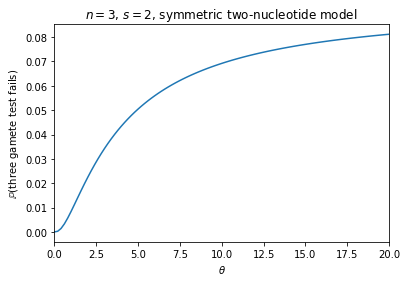

In [24]:
# for i in range(0,13):
#     plt.plot(thetas,[sum(probs[x,:(i+1)]) for x in range(len(thetas))])
plt.plot(thetas,probs[:,10])
plt.title('$n=3$, $s=2$, symmetric two-nucleotide model')
plt.ylabel(r'$\mathbb{P}($three gamete test fails$)$')
plt.xlabel(r'$\theta$')
#plt.ylim(0.0,1.0)
plt.xlim(min(thetas),max(thetas))
plt.show()